In [30]:
from pylab import *
import matplotlib.pyplot as plt
import pyAgrum.lib.notebook as gnb
import pyAgrum as gum
import pyAgrum.lib.image as gumimage 
from IPython.display import Image #to display exported images
import os

#create Bayesian Decision network
#define nodes
dn = gum.InfluenceDiagram()
chance_var_names = ["EmpStatus", "AvgIncome", "Quintile", "TeachQual", "PupilTeacherRatio", "PassingMatric"]
empStatus, avgIncome, quintile, teachQual, pupilTeacherRatio, passingMatric = [
dn.add(gum.LabelizedVariable(name, name, 2))
for name in chance_var_names]
support = dn.addDecisionNode(gum.LabelizedVariable("ExternalAcademicSupport",
"ExternalAcademicSupport", 2))
u = dn.addUtilityNode(gum.LabelizedVariable("U", "U", 1))



In [31]:
#add arcs
dn.addArc(empStatus, avgIncome)
dn.addArc(avgIncome, quintile)
dn.addArc(quintile, pupilTeacherRatio)
dn.addArc(quintile, teachQual)
#dn.addArc(pupilTeacherRatio, support)
#dn.addArc(teachQual, support)
dn.addArc(support, passingMatric)
dn.addArc(pupilTeacherRatio, passingMatric)
dn.addArc(teachQual, passingMatric)
dn.addArc(passingMatric, u)



In [32]:


#define probabilities
dn.cpt("EmpStatus").fillWith([0.3,0.7])
dn.cpt("AvgIncome")[:] = [[0.971, 0.029], [0.645, 0.355]]
dn.cpt("Quintile")[:] = [[0.987, 0.013], [0.840, 0.160]]
dn.cpt("PupilTeacherRatio")[:] = [[0.227, 0.773], [0.840, 0.16]]
dn.cpt("TeachQual")[:] = [[0.340, 0.660], [0.038, 0.962]]

dn.cpt("PassingMatric")[{'PupilTeacherRatio': 0, 'TeachQual':0, 'ExternalAcademicSupport':0}] = [0.42, 0.58]
dn.cpt("PassingMatric")[{'PupilTeacherRatio': 0, 'TeachQual':0, 'ExternalAcademicSupport':1}] = [0.31, 0.69]
dn.cpt("PassingMatric")[{'PupilTeacherRatio': 0, 'TeachQual':1, 'ExternalAcademicSupport':0}] = [0.179, 0.821]
dn.cpt("PassingMatric")[{'PupilTeacherRatio': 0, 'TeachQual':1, 'ExternalAcademicSupport':1}] = [0.169, 0.831]

dn.cpt("PassingMatric")[{'PupilTeacherRatio': 1, 'TeachQual':0, 'ExternalAcademicSupport':0}] = [0.72, 0.28]
dn.cpt("PassingMatric")[{'PupilTeacherRatio': 1, 'TeachQual':0, 'ExternalAcademicSupport':1}] = [0.63, 0.37]
dn.cpt("PassingMatric")[{'PupilTeacherRatio': 1, 'TeachQual':1, 'ExternalAcademicSupport':0}] = [0.62, 0.38]
dn.cpt("PassingMatric")[{'PupilTeacherRatio': 1, 'TeachQual':1, 'ExternalAcademicSupport':1}] = [0.57, 0.43]

dn.utility("U")[{'PassingMatric' : 0}] = -50
dn.utility("U")[{'PassingMatric' : 1}] = 70


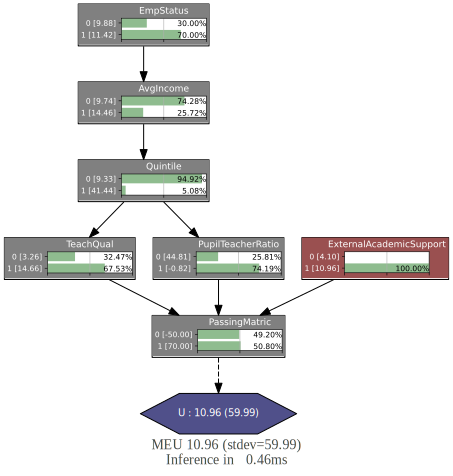

In [42]:
gnb.showInference(dn,evs={})

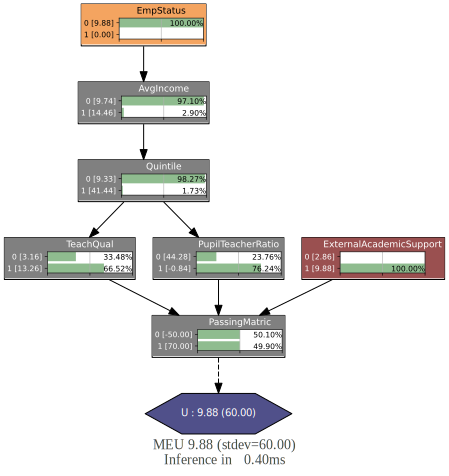

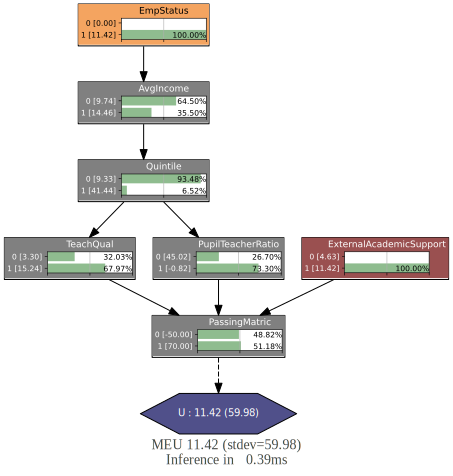

In [47]:
gnb.showInference(dn,evs={'EmpStatus':0})
gnb.showInference(dn,evs={'EmpStatus':1})


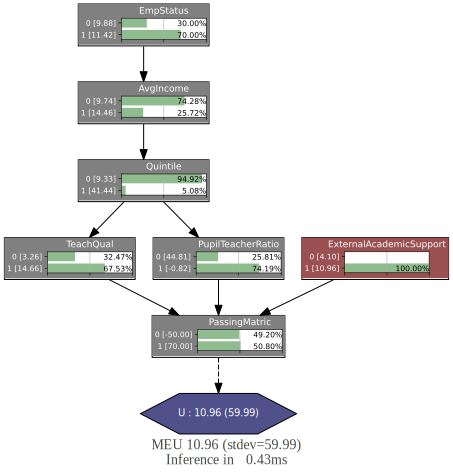

In [43]:
gnb.showInference(dn,evs={})
gnb.flow.row(gnb.getInference(dn))


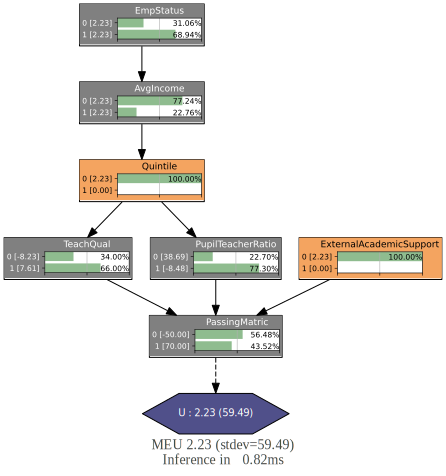

In [41]:
gnb.showInference(dn,evs={'Quintile':0, 'ExternalAcademicSupport':0})

In [7]:
ie=gum.ShaferShenoyLIMIDInference(dn)
ie.setEvidence({'Quintile':1})
ie.makeInference()
ie.optimalDecision("ExternalAcademicSupport")

(pyAgrum.Potential<double>@0x55cfaecef8a0) 
             ||  ExternalAcademicS|
PupilT|TeachQ||0        |1        |
------|------||---------|---------|
0     |0     || 0.0000  | 1.0000  |
1     |0     || 0.0000  | 1.0000  |
0     |1     || 1.0000  | 0.0000  |
1     |1     || 0.0000  | 1.0000  |

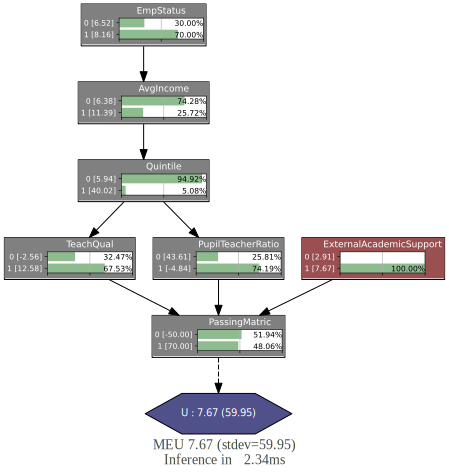

In [14]:
dn.eraseArc(teachQual, support) # remove the information link
dn.eraseArc(pupilTeacherRatio, support) # remove the information link
gnb.showInference(dn,evs={})


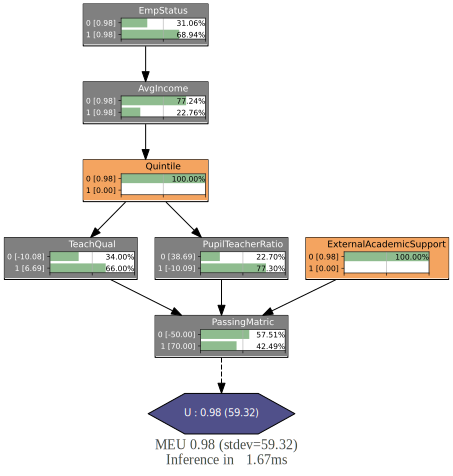

In [18]:
gnb.showInference(dn,evs={'Quintile':0, 'ExternalAcademicSupport':0})


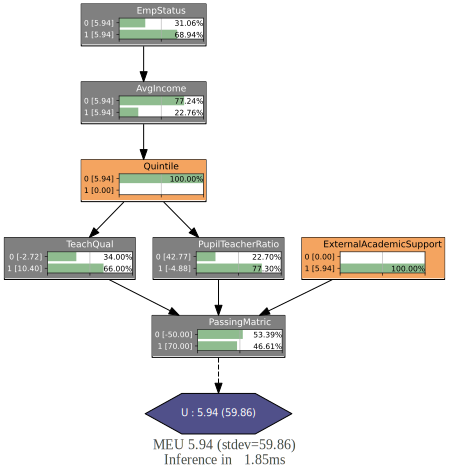

In [19]:
gnb.showInference(dn,evs={'Quintile':0, 'ExternalAcademicSupport':1})